In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os
import sys
import IPython.display as ipd
from enum import Enum
sys.path.append(os.path.abspath('./src'))
from helpers import *
from dataset_gen import *

In [2]:
data_folder = './public_dataset/train/' #Location of public dataset in your file directory
subj_ids = os.listdir(data_folder)
print("There are {0} subjects".format(len(subj_ids)))

There are 10 subjects


In [3]:
print(subj_ids)

['74768', '38936', '14342', '97706', '47779', '14287', '20794', '14547', '49661', '55502']


In [4]:
# Seed the random number generator for augmentation purposes
seed = 1
np.random.seed(seed)

In [5]:
# Example: generate dataset with a window length of 0.7 seconds augmented twice
audio_data, imu_data, labels, total_coughs = get_samples_for_subject(data_folder, subj_id="14287", window_len=0.7, aug_factor=2)

In [11]:
print("Audio data shape: {0}".format(audio_data.shape))
print("IMU data shape: {0}".format(imu_data.shape))
print("Labels shape: {0}".format(labels.shape))
print("Number of total coughs before augmentation: {0}".format(total_coughs))

Audio data shape: (2040, 11200, 2)
IMU data shape: (2040, 70, 6)
Labels shape: (2040,)
Number of total coughs before augmentation: 255


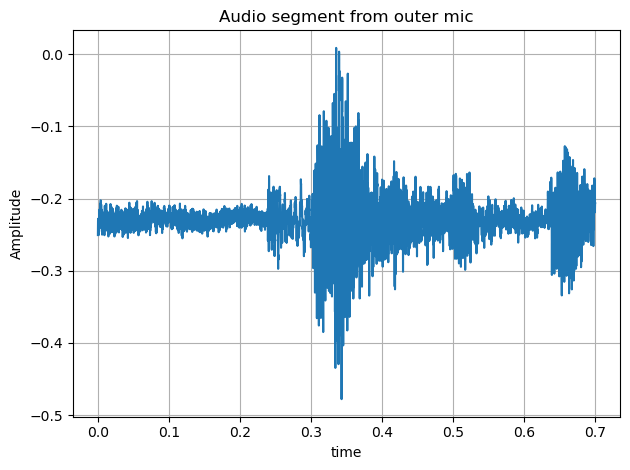

In [13]:
# Plot a sample signal of the outer microphone
n = 15
samp = audio_data[n,:,0]
plt.plot(np.arange(len(samp))/FS_AUDIO, samp)
plt.title('Audio segment from outer mic')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.grid(True)
ipd.Audio(samp, rate=FS_AUDIO, autoplay=True)

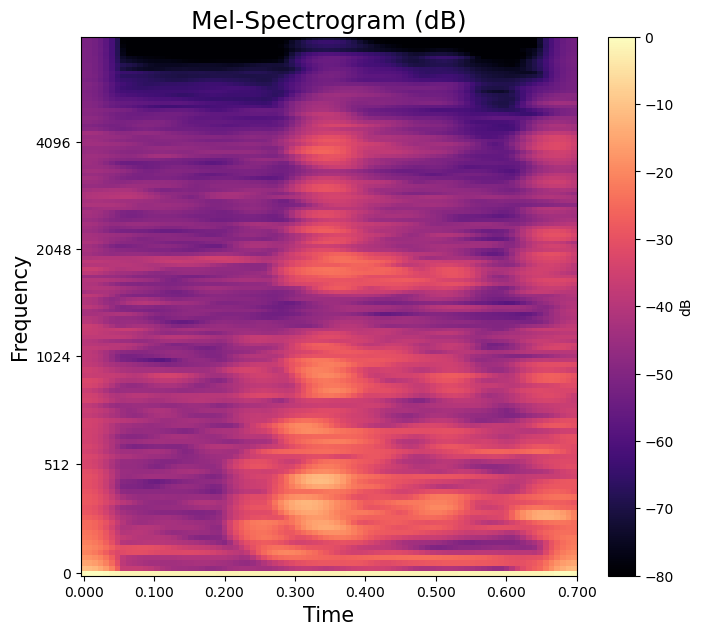

In [15]:
import librosa
mel_signal = librosa.feature.melspectrogram(y=audio_data[n,:,0], sr=FS_AUDIO, hop_length=128, n_fft=2048)
# gathering the absolute values for all values in our audio_stft
spectrogram = np.abs(mel_signal)
# Converting the power to decibels
power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
plt.figure(figsize=(8, 7))
librosa.display.specshow(power_to_db, sr=FS_AUDIO, x_axis='time', y_axis='mel', cmap='magma',
 hop_length=128)
plt.colorbar(label='dB')
plt.title('Mel-Spectrogram (dB)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()

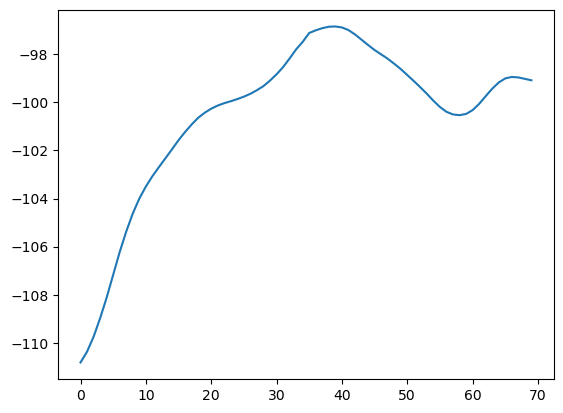

In [13]:
# Plot a sample signal of the negated z direction of the accelerometer
plt.plot(-imu_data[n,:,2])

Our code

In [6]:
# control params
window_len=0.7
aug_factor=2
# this is the number of samples in a window per fft
n_fft = 2048
# The amount of samples we are shifting after each fft
hop_length = 128
save_path = './data/EdgeAICough/'

In [7]:
data_folder = './public_dataset/train/' #Location of public dataset in your file directory

subj_ids = os.listdir(data_folder)
print("There are {0} subjects".format(len(subj_ids)))

audio_data_all = np.zeros((0, round(window_len*FS_AUDIO), 2))
labels_all = np.zeros(0)
for subj_id in subj_ids:
    audio_data, imu_data, labels, total_coughs = get_samples_for_subject(data_folder, subj_id=subj_id, window_len=window_len, aug_factor=aug_factor)
    audio_data_all = np.concatenate((audio_data_all, audio_data), axis=0)
    labels_all = np.concatenate((labels_all, labels), axis=0)
    print("Audio data shape: {0}".format(audio_data.shape))
    print("Labels shape: {0}".format(labels.shape))
    print("Number of total coughs before augmentation: {0}".format(total_coughs))

There are 12 subjects
Audio data shape: (2370, 11200, 2)
Labels shape: (2370,)
Number of total coughs before augmentation: 299
Audio data shape: (2704, 11200, 2)
Labels shape: (2704,)
Number of total coughs before augmentation: 338
Audio data shape: (1720, 11200, 2)
Labels shape: (1720,)
Number of total coughs before augmentation: 215
Audio data shape: (2368, 11200, 2)
Labels shape: (2368,)
Number of total coughs before augmentation: 296
Audio data shape: (2680, 11200, 2)
Labels shape: (2680,)
Number of total coughs before augmentation: 335
Audio data shape: (2240, 11200, 2)
Labels shape: (2240,)
Number of total coughs before augmentation: 280
Audio data shape: (2560, 11200, 2)
Labels shape: (2560,)
Number of total coughs before augmentation: 320
Audio data shape: (2040, 11200, 2)
Labels shape: (2040,)
Number of total coughs before augmentation: 255
Audio data shape: (1336, 11200, 2)
Labels shape: (1336,)
Number of total coughs before augmentation: 167
Audio data shape: (2408, 11200, 2

In [8]:
data_folder = './public_dataset/test/' #Location of public dataset in your file directory

subj_ids = os.listdir(data_folder)
print("There are {0} subjects".format(len(subj_ids)))

audio_data_test = np.zeros((0, round(window_len*FS_AUDIO), 2))
labels_test = np.zeros(0)
for subj_id in subj_ids:
    audio_data, imu_data, labels, total_coughs = get_samples_for_subject(data_folder, subj_id=subj_id, window_len=window_len, aug_factor=aug_factor)
    audio_data_test = np.concatenate((audio_data_test, audio_data), axis=0)
    labels_test = np.concatenate((labels_test, labels), axis=0)
    print("Audio data shape: {0}".format(audio_data.shape))
    print("Labels shape: {0}".format(labels.shape))
    print("Number of total coughs before augmentation: {0}".format(total_coughs))

There are 3 subjects
Audio data shape: (2328, 11200, 2)
Labels shape: (2328,)
Number of total coughs before augmentation: 291
Audio data shape: (2136, 11200, 2)
Labels shape: (2136,)
Number of total coughs before augmentation: 267
Audio data shape: (2096, 11200, 2)
Labels shape: (2096,)
Number of total coughs before augmentation: 262


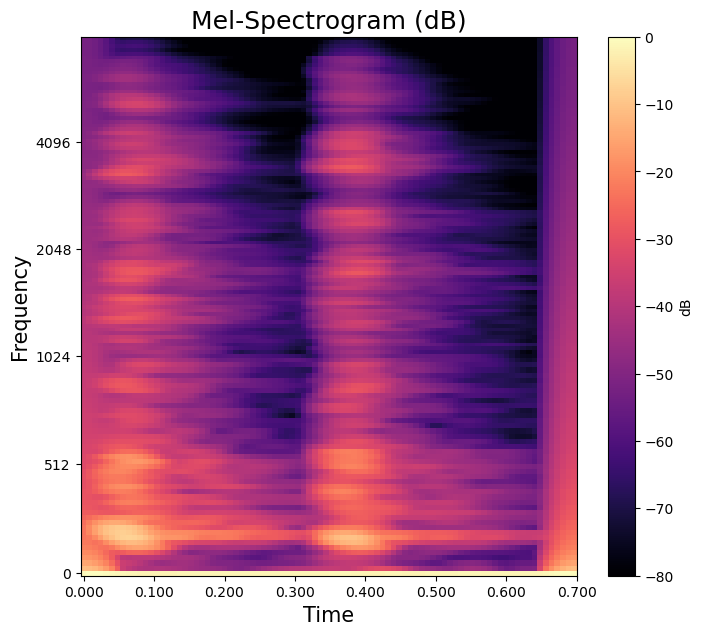

In [48]:
import librosa, librosa.display
for audio_data_train in audio_data_all[:1]:
    # MEL Short-time Fourier Transformation on our audio data
    # Short-time Fourier Transformation on our audio data
    #mel_signal = librosa.core.stft(audio_data_train[:,0], hop_length=hop_length, n_fft=n_fft)
    mel_signal = librosa.feature.melspectrogram(y=audio_data_train[:,0], sr=FS_AUDIO, hop_length=hop_length, n_fft=n_fft)
    # gathering the absolute values for all values in our audio_stft
    spectrogram = np.abs(mel_signal)
    # Converting the power to decibels
    power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
    plt.figure(figsize=(8, 7))
    librosa.display.specshow(power_to_db, sr=FS_AUDIO, x_axis='time', y_axis='mel', cmap='magma',
     hop_length=hop_length)
    plt.colorbar(label='dB')
    plt.title('Mel-Spectrogram (dB)', fontdict=dict(size=18))
    plt.xlabel('Time', fontdict=dict(size=15))
    plt.ylabel('Frequency', fontdict=dict(size=15))
    plt.show()


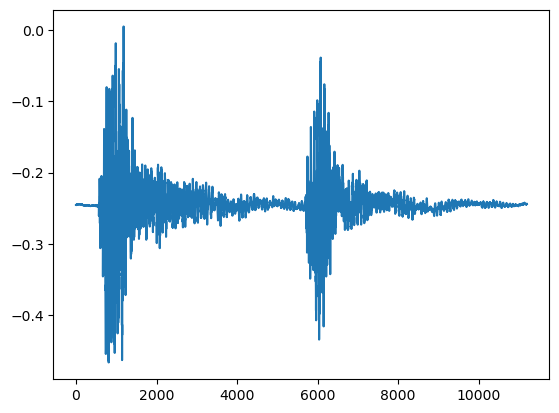

In [41]:
# Plot a sample signal of the outer microphone
n = 0
samp = audio_data_all[n,:,0]
plt.plot(samp)
ipd.Audio(samp, rate=FS_AUDIO, autoplay=True)

In [49]:
print(power_to_db.shape)

(128, 88)


In [9]:
import librosa, librosa.display
mel_data_train = np.zeros((audio_data_all.shape[0], 128, 88, 2))
for i,audio_data_train in enumerate(audio_data_all):
    # MEL Short-time Fourier Transformation on our audio data
    # Short-time Fourier Transformation on our audio data
    #mel_signal = librosa.core.stft(audio_data_train[:,0], hop_length=hop_length, n_fft=n_fft)
    mel_signal = librosa.feature.melspectrogram(y=audio_data_train[:,0], sr=FS_AUDIO, hop_length=hop_length, n_fft=n_fft)
    # gathering the absolute values for all values in our audio_stft
    spectrogram = np.abs(mel_signal)
    # Converting the power to decibels
    power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
    mel_data_train[i,:,:,0] = power_to_db

    mel_signal = librosa.feature.melspectrogram(y=audio_data_train[:,1], sr=FS_AUDIO, hop_length=hop_length, n_fft=n_fft)
    spectrogram = np.abs(mel_signal)
    power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
    mel_data_train[i,:,:,1] = power_to_db

In [10]:
import librosa, librosa.display
mel_data_test = np.zeros((audio_data_test.shape[0], 128, 88, 2))
for i,audio_data_tst in enumerate(audio_data_test):
    # MEL Short-time Fourier Transformation on our audio data
    # Short-time Fourier Transformation on our audio data
    #mel_signal = librosa.core.stft(audio_data_tst[:,0], hop_length=hop_length, n_fft=n_fft)
    mel_signal = librosa.feature.melspectrogram(y=audio_data_tst[:,0], sr=FS_AUDIO, hop_length=hop_length, n_fft=n_fft)
    # gathering the absolute values for all values in our audio_stft
    spectrogram = np.abs(mel_signal)
    # Converting the power to decibels
    power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
    mel_data_test[i,:,:,0] = power_to_db

    mel_signal = librosa.feature.melspectrogram(y=audio_data_train[:,1], sr=FS_AUDIO, hop_length=hop_length, n_fft=n_fft)
    spectrogram = np.abs(mel_signal)
    power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
    mel_data_test[i,:,:,1] = power_to_db

In [11]:
import torch

if not os.path.exists(save_path):
    os.makedirs(save_path, exist_ok=True)

tensor_data = torch.tensor(mel_data_train)
file_path = "train.pt"
torch.save(tensor_data, save_path+file_path)

tensor_data = torch.tensor(mel_data_test)
file_path = "test.pt"
torch.save(tensor_data, save_path+file_path)

In [13]:
tensor_data = torch.tensor(labels_all)
file_path = "train_labels.pt"
torch.save(tensor_data, save_path+file_path)

tensor_data = torch.tensor(labels_test)
file_path = "test_labels.pt"
torch.save(tensor_data, save_path+file_path)

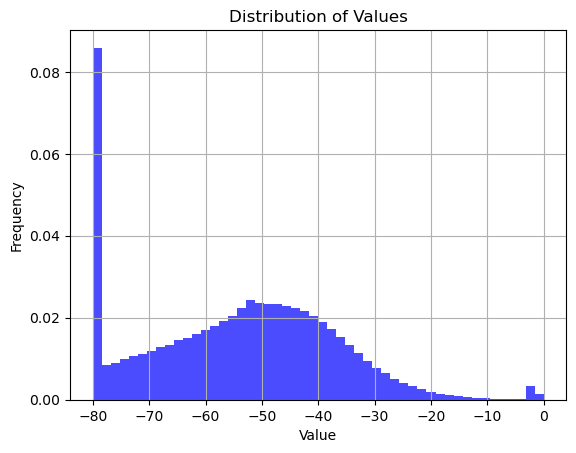

In [12]:
# Assuming 'data' is your NumPy array
data = mel_data_train.flatten()  # Example random data

# Plot the histogram
plt.hist(data, bins=50, density=True, alpha=0.7, color='blue')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Values')
plt.grid(True)
plt.show()

In [2]:
import torch

file_path = "./data/EdgeAICough/"
loaded_tensor = torch.load(file_path + 'train.pt')
train_data = loaded_tensor.numpy()
loaded_tensor = torch.load(file_path + 'train_labels.pt')
train_targets = loaded_tensor.numpy()

loaded_tensor = torch.load(file_path + 'test.pt')
test_data = loaded_tensor.numpy()
loaded_tensor = torch.load(file_path + 'test_labels.pt')
test_targets = loaded_tensor.numpy()
